<a href="https://colab.research.google.com/github/Aditi0255/Stock-Trend-Insight-A-News-driven-Stock-Trend-Predictor/blob/main/Stock_trend_Insight_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
data=pd.read_csv('/content/Combined_News_DJIA.csv')
#Dataset contaning the Top 25 news headlines on the day
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
# Handling missing values and removing unwanted characters and delimiters
data = data.replace(np.nan, ' ', regex=True)
data.isnull().sum().sum()
data = data.replace('b\"|b\'|\\\\|\\\"', '', regex=True)
#Reading GJIA index dataset and merging it with the news headlines based on the 'Date' column
data2=pd.read_csv("/content/upload_DJIA_table.csv")
data2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [4]:
#Combining the data set with the Market price movement
merge=data.merge(data2,how="inner",on="Date")
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict',Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war',So this is what it's come to: trading sex for ...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,Russia 'ends Georgia operation',If we had no sexual harassment we would have n...,Al-Qa'eda is losing support in Iraq because of...,Ceasefire in Georgia: Putin Outmaneuvers the W...,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,I'm Trying to Get a Sense of This Whole Georgi...,...,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?',BBC NEWS | Asia-Pacific | Extinction 'by man n...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,Britain's policy of being tough on drugs is po...,Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russia'...,Russian forces sink Georgian ships ',...,Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random House's Refusal to Pub...,Poland and US agree to missle defense deal. In...,"Will the Russians conquer Tblisi? Bet on it, n...",...,Taliban wages war on humanitarian aid workers',Russia: World can forget about Georgia's terr...,Darfur rebels accuse Sudan of mounting major a...,Philippines : Peace Advocate say Muslims need ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [5]:
import sys
!{sys.executable} -m pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 93.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=02f04cfcce0aa016544516e7ab5690cbcc075c9df26c2c243e72d38be661870d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d0

In [6]:
# Extracting and cleaning headlines
headline=[]
for row in range(0,len(merge.index)):
    headline.append(" ".join(str(x) for x in merge.iloc[row,2:27]))
headline[1]

"Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?' Bush puts foot down on Georgian conflict' Jewish Georgian minister: Thanks to Israeli training, we're fending off Russia  Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired' Olympic opening ceremony fireworks 'faked' What were the Mossad with fraudulent New Zealand Passports doing in Iraq?' Russia angered by Israeli military sale to Georgia' An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people' Welcome To World War IV! Now In High Definition!' Georgia's move, a mistake of monumental proportions  Russia presses deeper into Georgia; U.S. says regime change is goal' Abhinav Bindra wins first ever Individual Olympic Gold Medal for India'  U.S. ship heads for Arctic to define territory' Drivers in a Jerusalem taxi station threaten to quit rather than work for their new boss - an Ara The French Te

In [7]:
clean_headline=[]
for i in range(0,len(headline)):
    clean_headline.append(re.sub("b[(')]",'',headline[i])) #remove b'
    clean_headline[i]=re.sub('b[(")]','',clean_headline[i]) #remove b"
    clean_headline[i]=re.sub("\'",'',clean_headline[i]) #remove \'
# Adding the combined and cleaned news back to the merge table
merge['Combined_News'] = clean_headline
samples = list(merge['Combined_News'][:5].values)
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict',Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war',So this is what it's come to: trading sex for ...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,Russia 'ends Georgia operation',If we had no sexual harassment we would have n...,Al-Qa'eda is losing support in Iraq because of...,Ceasefire in Georgia: Putin Outmaneuvers the W...,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,I'm Trying to Get a Sense of This Whole Georgi...,...,Christopher King argues that the US and NATO a...,America: The New Mexico?',BBC NEWS | Asia-Pacific | Extinction 'by man n...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,Britain's policy of being tough on drugs is po...,Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russia'...,Russian forces sink Georgian ships ',...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random House's Refusal to Pub...,Poland and US agree to missle defense deal. In...,"Will the Russians conquer Tblisi? Bet on it, n...",...,Russia: World can forget about Georgia's terr...,Darfur rebels accuse Sudan of mounting major a...,Philippines : Peace Advocate say Muslims need ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,All the experts admit that we should legalise ...


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [9]:
token_index = {}  # builds an index of tokens in the data
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

In [10]:
max_length = 15

results = np.zeros(shape=(len(samples),   # results will be stored in this array
                          max_length,
                          max(token_index.values()) +1))

In [11]:
print("Shape of stored results array:", results.shape)
print("Token index of unique words: \n", token_index)

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1

Shape of stored results array: (5, 15, 873)
Token index of unique words: 
 {'Georgia': 1, 'downs': 2, 'two': 3, 'Russian': 4, 'warplanes': 5, 'as': 6, 'countries': 7, 'move': 8, 'to': 9, 'brink': 10, 'of': 11, 'war': 12, 'BREAKING:': 13, 'Musharraf': 14, 'be': 15, 'impeached.': 16, 'Russia': 17, 'Today:': 18, 'Columns': 19, 'troops': 20, 'roll': 21, 'into': 22, 'South': 23, 'Ossetia;': 24, 'footage': 25, 'from': 26, 'fighting': 27, '(YouTube)': 28, 'tanks': 29, 'are': 30, 'moving': 31, 'towards': 32, 'the': 33, 'capital': 34, 'Ossetia,': 35, 'which': 36, 'has': 37, 'reportedly': 38, 'been': 39, 'completely': 40, 'destroyed': 41, 'by': 42, 'Georgian': 43, 'artillery': 44, 'fire': 45, 'Afghan': 46, 'children': 47, 'raped': 48, 'with': 49, 'impunity,': 50, 'U.N.': 51, 'official': 52, 'says': 53, '-': 54, 'this': 55, 'is': 56, 'sick,': 57, 'a': 58, 'three': 59, 'year': 60, 'old': 61, 'was': 62, 'and': 63, 'they': 64, 'do': 65, 'nothing': 66, '150': 67, 'have': 68, 'entered': 69, 'Ossetia':

In [12]:
# one hot encoding using keras tokenizer and pad sequencing
X = merge['Combined_News']
encoder = LabelEncoder()
y=merge['Label']
print("shape of input data: ", X.shape)
print("shape of target variable: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

shape of input data:  (1989,)
shape of target variable:  (1989,)


In [13]:
import tqdm
import nltk
import re
from bs4 import BeautifulSoup
import requests
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
# Function to remove accented characters(á, é, í, ó) and stop words
def remove_accented_characters(text):
    text =  unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
    return text

def contractions_text(text):
    return contractions.fix(text)

def stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence
# Applying preprocessing functions to the text
def preprocessor_engine(text):
    corpus =[]
    for sent in tqdm.tqdm(text):
        sent = remove_accented_characters(sent)
        sent = stop_words(sent)
        corpus.append(sent)
    return corpus


In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
train_data_pro = preprocessor_engine(X_train)
test_data_pro = preprocessor_engine(X_test)

100%|██████████| 398/398 [00:01<00:00, 352.09it/s]


In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

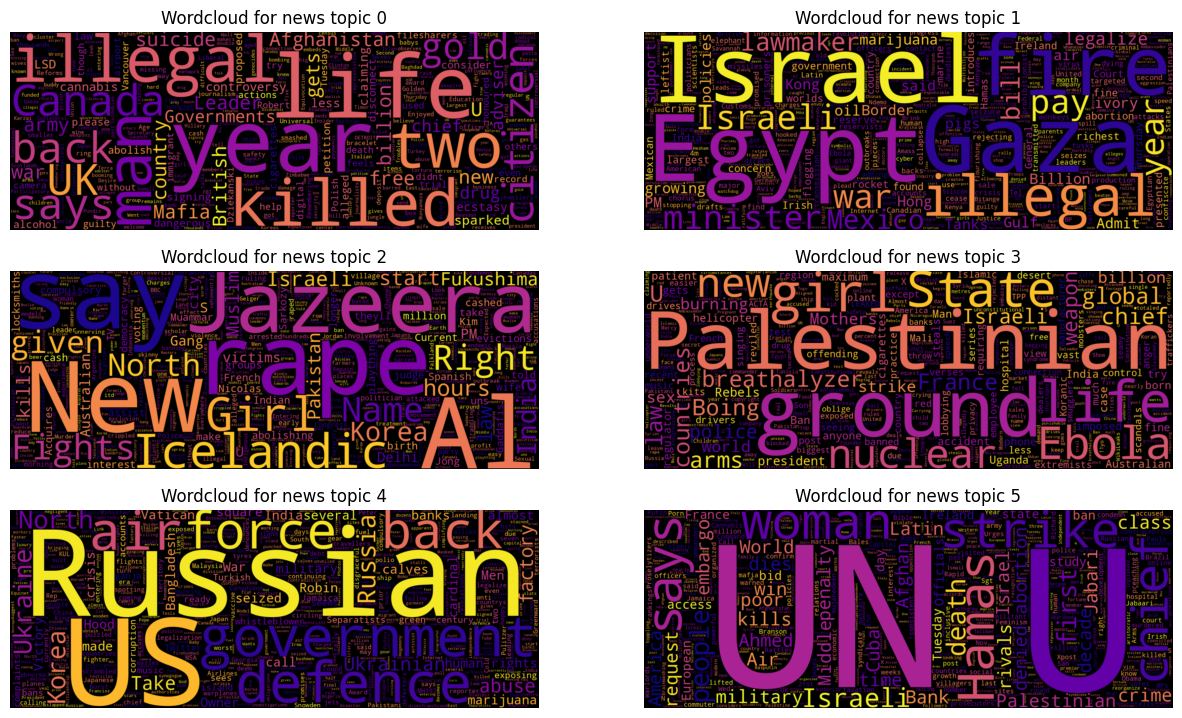

In [18]:
# Creating word clouds for visualizing news topics
articles_list=[]
cat_array = train_data_pro # array of news articles text in each category
for i in range(len(cat_array)):
    articles_list.append(cat_array[i])
wc1 = WordCloud(max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=True,
               stopwords=STOPWORDS)
plt.figure(figsize=(15,15))

for id in range(6):
    plt.subplot(5, 2, id % 10 + 1)
    cloud = wc1.generate(' '.join(articles_list[id]))
    plt.imshow(cloud, interpolation= "bilinear")
    plt.title(f"Wordcloud for news topic {id}")
    plt.axis('off')

In [19]:
# Tokenizing and padding sequences for training the model
tokenizer = Tokenizer( oov_token='<UNK>')
tokenizer.fit_on_texts(train_data_pro) # build the word index
train_sequences = tokenizer.texts_to_sequences(train_data_pro)
test_sequences = tokenizer.texts_to_sequences(test_data_pro)
MAX_SEQUENCE_LENGTH = 424

train_pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
test_pad_sequneces = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
total_words=len(tokenizer.word_index) + 1


In [20]:
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dropout, Dense
from keras.callbacks import EarlyStopping
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense


In [21]:

# Building a Bidirectional LSTM model
model = Sequential()
model.add(Embedding(total_words, 300, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(64, dropout=0.1, recurrent_dropout=0.20, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.1, recurrent_dropout=0.30, return_sequences=True)))
model.add(LSTM(32, dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification
model.summary()
#using rmsprop as optimizer
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 424, 300)          11106300  
                                                                 
 bidirectional (Bidirection  (None, 424, 128)          186880    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 424, 128)          98816     
 onal)                                                           
                                                                 
 lstm_2 (LSTM)               (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [22]:

# Implement Early Stopping as a regularization technique
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_pad_sequences, y_train,
    batch_size=128,
    epochs=100,
    validation_split=0.1,
    callbacks=[early_stopping]
)

#evaluting the model
test_loss, test_acc = model.evaluate(test_pad_sequneces, y_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)


Epoch 1/100
12/12 [==============================] - 73s 5s/step - loss: 0.6931 - accuracy: 0.5213 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 62s 5s/step - loss: 0.6909 - accuracy: 0.5339 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 61s 5s/step - loss: 0.6917 - accuracy: 0.5346 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 4/100
12/12 [==============================] - 62s 5s/step - loss: 0.6906 - accuracy: 0.5325 - val_loss: 0.6960 - val_accuracy: 0.5000
test loss and accuracy: 0.689721941947937 0.5502512454986572


In [23]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
#Finding the Subjitivity and polarity score from the data set using TExtBlob
merge['Subjectivity'] = merge['Combined_News'].apply(get_subjectivity)
merge['Polarity'] = merge['Combined_News'].apply(get_polarity)

TextBlob aims to provide access to common text-processing operations through a familiar interface. You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.



In [24]:
!pip install scikit-plot

In [25]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.7 MB/s eta 0:00:00


Vader Sentiment Analysis helps is putting out the score as overall sentiment score as positive or negative.

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [27]:
# Performing sentiment analysis using VADER
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [28]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(merge['Combined_News'])):
    SIA= getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [29]:
merge['compound']= compound
merge['neg']= neg
merge['pos']=pos
merge['neu']=neu

In [30]:
df= merge[['Label','Open', 'High', 'Low','Volume','Subjectivity','Polarity','compound','neg','pos','neu']]
df

,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.192,0.089,0.719
2,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,0,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717
...,...,...,...,...,...,...,...,...,...,...,...
1984,0,17355.210938,17355.210938,17063.080078,138740000,0.352311,-0.014015,-0.9644,0.148,0.094,0.758
1985,1,17190.509766,17409.720703,17190.509766,112190000,0.352649,0.046560,-0.9571,0.132,0.102,0.767
1986,1,17456.019531,17704.509766,17456.019531,106380000,0.389617,0.052622,-0.9975,0.225,0.091,0.684
1987,1,17712.759766,17930.609375,17711.800781,133030000,0.382566,0.011243,-0.9977,0.202,0.061,0.738


In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X = df.drop(['Label'], axis=1)
y = df['Label']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applying SMOTE for minority resampling
smote = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Create RandomForestClassifier model with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train_resampled, y_train_resampled)

# Getting the best parameters for RandomForestClassifier
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for RandomForestClassifier:", best_params_rf)
best_model_rf = grid_search_rf.best_estimator_
predictions_rf = best_model_rf.predict(x_test)

# Evaluating the accuracy for RandomForestClassifier
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"Accuracy for RandomForestClassifier: {accuracy_rf}")

# Creating LDA model with hyperparameter tuning
lda_model = LinearDiscriminantAnalysis()
param_grid_lda = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}

grid_search_lda = GridSearchCV(lda_model, param_grid_lda, cv=5, scoring='accuracy')
grid_search_lda.fit(x_train_resampled, y_train_resampled)

# Getting the best parameters for LinearDiscriminantAnalysis
best_params_lda = grid_search_lda.best_params_
print("Best Hyperparameters for LinearDiscriminantAnalysis:", best_params_lda)
best_model_lda = grid_search_lda.best_estimator_
predictions_lda = best_model_lda.predict(x_test)

# Evaluating the accuracy for LinearDiscriminantAnalysis
accuracy_lda = accuracy_score(y_test, predictions_lda)
print(f"Accuracy for LinearDiscriminantAnalysis: {accuracy_lda}")


Best Hyperparameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy for RandomForestClassifier: 0.5703517587939698
Best Hyperparameters for LinearDiscriminantAnalysis: {'shrinkage': None, 'solver': 'lsqr'}
Accuracy for LinearDiscriminantAnalysis: 0.8517587939698492


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

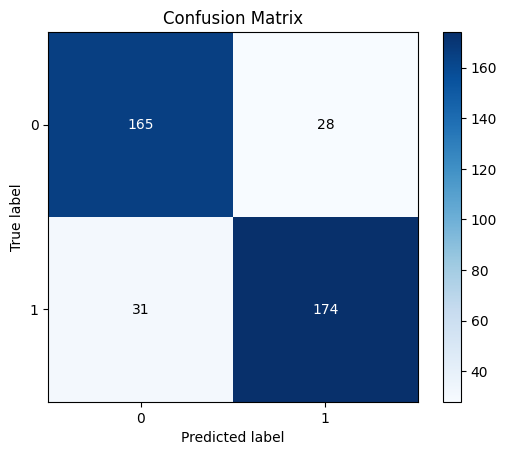

In [64]:
from scikitplot.metrics import plot_confusion_matrix as plt
plt(y_test,predictions_lda)
